# (1). 군집분석

In [6]:
import pandas as pd

from matplotlib import font_manager, rc
from matplotlib import pyplot as plt

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

In [7]:
# 차트에서 한글 출력을 위한 설정
import platform
your_os = platform.system()
if your_os == 'Linux':
    rc('font', family='NanumGothic')
elif your_os == 'Windows':
    ttf = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=ttf).get_name()
    rc('font', family=font_name)
elif your_os == 'Darwin':
    rc('font', family='AppleGothic')
rc('axes', unicode_minus=False)

## 1.1. data

In [8]:
data = pd.read_csv('2_수도권_회귀_데이터_최종.csv')
data2 = pd.read_csv('2_서울_회귀_예측.csv')
data.head()

,SIG_CD,도시,자치구,N1인_가구수,N2인이상_가구,PC방_총종사자수,const,가구원_모두_65세이상_가구수,고혈압소계,노래연습장업수,...,유출유입평균,유흥주점영업수,음식점_종사자수,의원수,전화권유업체수,종교단체총종사자수,진해거담제_청구건수평균,집단시설_가구원수,총가구_가구원_계,확진자수
0,11110,서울특별시,종로구,24671,37981,0.140673,1.0,8079,0.514296,70,...,348354.00,54,16.422639,56.000000,20.000000,1.313166,9.663868,3.545225,154969,84
1,11140,서울특별시,중구,22078,32418,0.090870,1.0,6990,0.543690,110,...,387669.50,359,18.722940,176.000000,71.000000,0.730011,18.501646,2.304573,130957,55
2,11170,서울특별시,용산구,35148,58029,0.055462,1.0,11019,0.489478,83,...,230206.00,31,7.777499,90.000000,30.000000,0.568269,20.696801,1.239100,227181,113
3,11200,서울특별시,성동구,41488,81282,0.079416,1.0,12806,0.543565,190,...,250183.75,37,3.998492,147.000000,38.000000,0.216892,19.779371,1.212928,299688,110
4,11215,서울특별시,광진구,58714,91191,0.102567,1.0,14132,0.575652,338,...,243778.00,16,4.256934,0.047531,0.004447,899.000000,15.146901,1.778100,359766,121


- 단위가 큰 변수로 군집이 정해지는 경향이 있기 때문에, 정규화 후 군집화 실행

In [9]:
ss = StandardScaler()
data_scale = ss.fit_transform(data[['N1인_가구수','가구원_모두_65세이상_가구수','병원_병상수','병원_의료인수','유흥주점영업수']])
data_scale = pd.DataFrame(data_scale)
data_scale.columns = [['N1인_가구수','가구원_모두_65세이상_가구수','병원_병상수','병원_의료인수','유흥주점영업수']]

In [10]:
df = data[data['도시'] == '서울특별시']
df = df[['N1인_가구수','가구원_모두_65세이상_가구수','병원_병상수','병원_의료인수','유흥주점영업수']]

## 1.2. 정규화

In [11]:
ss = StandardScaler()
df_scale = ss.fit_transform(df)
df_scale = pd.DataFrame(df_scale)
df_scale.columns = df.columns

In [12]:
df_scale

,N1인_가구수,가구원_모두_65세이상_가구수,병원_병상수,병원_의료인수,유흥주점영업수
0,-1.421202,-1.920655,0.074059,1.204407,-0.310043
1,-1.556088,-2.136598,-1.503384,-0.588429,3.703669
2,-0.876192,-1.337667,-1.575707,-0.757614,-0.612716
3,-0.546387,-0.983314,-0.082641,-0.575415,-0.533758
4,0.349703,-0.720374,-0.433005,-0.394257,-0.810112
5,0.320468,0.126346,0.590766,0.018032,-0.310043
6,0.010639,0.555060,-0.098713,-0.331789,-0.744313
7,0.303822,0.575088,0.330403,-0.129288,-0.862751
8,-0.478606,0.405942,-0.573633,-0.802383,-0.191605
9,-1.005981,0.126941,-0.981856,-1.093901,-0.717994


## 1.3. K-Means

In [13]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df_scale)
    distortions.append(kmeanModel.inertia_)

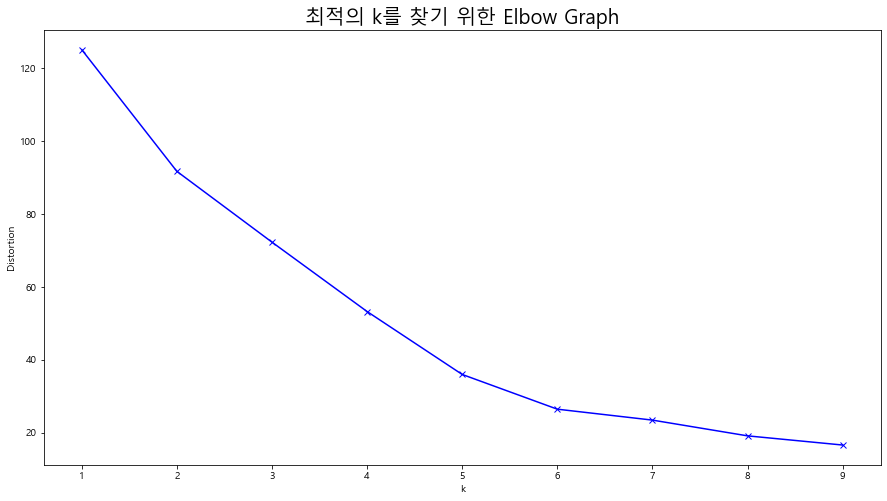

In [14]:
plt.figure(figsize=(15,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('최적의 k를 찾기 위한 Elbow Graph',fontsize=20)
plt.show()

- 군집수 5개로 결정

In [25]:
kms = KMeans(n_clusters=5).fit(df_scale)

In [26]:
res = pd.concat([data.iloc[:,:3],pd.DataFrame({'label':kms.labels_})],axis=1)
res = res.fillna(99)
res.iloc[:25,]

,SIG_CD,도시,자치구,label
0,11110,서울특별시,종로구,0.0
1,11140,서울특별시,중구,2.0
2,11170,서울특별시,용산구,0.0
3,11200,서울특별시,성동구,0.0
4,11215,서울특별시,광진구,0.0
5,11230,서울특별시,동대문구,3.0
6,11260,서울특별시,중랑구,3.0
7,11290,서울특별시,성북구,3.0
8,11305,서울특별시,강북구,0.0
9,11320,서울특별시,도봉구,0.0


# (2). 군집별 분포 확인

In [119]:
groupdata_fin = fin.groupby('group_label').agg(['mean','count'])['predict_value'].sort_values('mean',ascending=False).reset_index()
groupdata_fin['rank']=range(1,6)
groupdata_fin.columns=['group_label','mean_predict_value','count','rank']
groupdata_fin['호흡기전담클리닉_설치수']=[6,5,4,3,2]
groupdata_fin

,group_label,mean_predict_value,count,rank,호흡기전담클리닉_설치수
0,1,298.005406,2,1,6
1,2,246.237312,2,2,5
2,4,171.135417,13,3,4
3,0,157.263880,7,4,3
4,3,93.044792,1,5,2


In [115]:
fin.groupby('group_label').mean()

,real_value,predict_value,mean_predict_value,count,rank,호흡기전담클리닉_설치수,SIG_CD,label,x_data,y_data
group_label,,,,,,,,,,
0,155.000000,157.263880,157.263880,7.0,4.0,3.0,11470.000000,2.571429,3.135578,0.529710
1,297.000000,298.005406,298.005406,2.0,1.0,6.0,11560.000000,4.000000,4.886597,3.593653
2,279.500000,246.237312,246.237312,2.0,2.0,5.0,11695.000000,1.000000,4.193536,-0.852370
3,55.000000,93.044792,93.044792,1.0,5.0,2.0,11140.000000,2.000000,-2.206369,-0.103054
4,171.769231,171.135417,171.135417,13.0,3.0,4.0,11344.230769,1.153846,2.015898,2.996210


In [107]:
groupdata_fin = fin.groupby('group_label').agg(['mean','count'])['predict_value'].sort_values('mean',ascending=False).reset_index()
groupdata_fin['rank']=range(1,6)
groupdata_fin.columns=['group_label','mean_predict_value','count','rank']
groupdata_fin['호흡기전담클리닉_설치수']=[6,5,4,3,2]
groupdata_fin

,group_label,mean_predict_value,count,rank,호흡기전담클리닉_설치수
0,1,298.005406,2,1,6
1,2,246.237312,2,2,5
2,4,171.135417,13,3,4
3,0,157.263880,7,4,3
4,3,93.044792,1,5,2


In [1]:
2 * 6 + 2 *5 + 13 * 4 + 7 *3 + 1 *2

97

In [109]:
final_data = fin[['자치구','group_label','real_value','predict_value']]
final_data.head()
final = pd.merge(final_data,groupdata_fin,how='left',on='group_label')
final.to_csv('플젝데이터/호흡기전담클리닉_개수_최종데이터.csv',index=False,encoding='cp949')

,자치구,group_label,real_value,predict_value,mean_predict_value,count,rank,호흡기전담클리닉_설치수
0,종로구,0,84,82.550859,157.263880,7,4,3
1,중구,3,55,93.044792,93.044792,1,5,2
2,용산구,4,113,113.639094,171.135417,13,3,4
3,성동구,4,110,100.927527,171.135417,13,3,4
4,광진구,4,121,140.565894,171.135417,13,3,4
5,동대문구,0,141,173.136269,157.263880,7,4,3
6,중랑구,4,178,199.904217,171.135417,13,3,4
7,성북구,4,316,197.438185,171.135417,13,3,4
8,강북구,4,141,189.597947,171.135417,13,3,4
9,도봉구,4,163,166.875446,171.135417,13,3,4


In [112]:
fin[['자치구','group_label']]

,자치구,group_label
0,종로구,0
1,중구,3
2,용산구,4
3,성동구,4
4,광진구,4
5,동대문구,0
6,중랑구,4
7,성북구,4
8,강북구,4
9,도봉구,4


# (3). T-SNE 시각화

In [28]:
import numpy as np

In [94]:
np.random.seed(1234)

In [95]:
model = TSNE(learning_rate=100)
transformed = model.fit_transform(data_scale[['N1인_가구수','가구원_모두_65세이상_가구수','병원_병상수','병원_의료인수','유흥주점영업수']])

xs = transformed[:,0]
ys = transformed[:,1]

In [96]:
fxxx = pd.read_csv('호흡기전담클리닉_개수_최종데이터.csv',encoding='cp949')
fxxx.head()

,자치구,group_label,real_value,predict_value,mean_predict_value,count,rank,호흡기전담클리닉_설치수
0,종로구,0,84,82.550859,157.263880,7,4,3
1,중구,3,55,93.044792,93.044792,1,5,2
2,용산구,4,113,113.639094,171.135417,13,3,4
3,성동구,4,110,100.927527,171.135417,13,3,4
4,광진구,4,121,140.565894,171.135417,13,3,4


In [97]:
fin = pd.concat([res,pd.DataFrame(xs),pd.DataFrame(ys)],axis=1)
fin.columns = ['SIG_CD','도시','자치구','label','x_data','y_data']
fin

,SIG_CD,도시,자치구,label,x_data,y_data
0,11110,서울특별시,종로구,0.0,1.814312,-0.255353
1,11140,서울특별시,중구,2.0,-2.206369,-0.103054
2,11170,서울특별시,용산구,0.0,-0.861563,4.081279
3,11200,서울특별시,성동구,0.0,1.126750,2.333484
4,11215,서울특별시,광진구,0.0,2.108696,2.535863
...,...,...,...,...,...,...
72,41650,포천시,포천시,99.0,-2.749492,2.285210
73,41670,여주시,여주시,99.0,-2.974737,3.704091
74,41800,연천군,연천군,99.0,-4.167511,3.740552
75,41820,가평군,가평군,99.0,-3.750604,3.520264


In [98]:
fin = fin[fin.도시=='서울특별시']
fin = pd.merge(fxxx,fin,on=['자치구'])

In [99]:
fin

,자치구,group_label,real_value,predict_value,mean_predict_value,count,rank,호흡기전담클리닉_설치수,SIG_CD,도시,label,x_data,y_data
0,종로구,0,84,82.550859,157.263880,7,4,3,11110,서울특별시,0.0,1.814312,-0.255353
1,중구,3,55,93.044792,93.044792,1,5,2,11140,서울특별시,2.0,-2.206369,-0.103054
2,용산구,4,113,113.639094,171.135417,13,3,4,11170,서울특별시,0.0,-0.861563,4.081279
3,성동구,4,110,100.927527,171.135417,13,3,4,11200,서울특별시,0.0,1.126750,2.333484
4,광진구,4,121,140.565894,171.135417,13,3,4,11215,서울특별시,0.0,2.108696,2.535863
5,동대문구,0,141,173.136269,157.263880,7,4,3,11230,서울특별시,3.0,3.308798,1.685469
6,중랑구,4,178,199.904217,171.135417,13,3,4,11260,서울특별시,3.0,3.108217,2.697831
7,성북구,4,316,197.438185,171.135417,13,3,4,11290,서울특별시,3.0,3.341182,2.356755
8,강북구,4,141,189.597947,171.135417,13,3,4,11305,서울특별시,0.0,2.317616,3.222930
9,도봉구,4,163,166.875446,171.135417,13,3,4,11320,서울특별시,0.0,1.138429,3.717613


In [100]:
import seaborn as sns

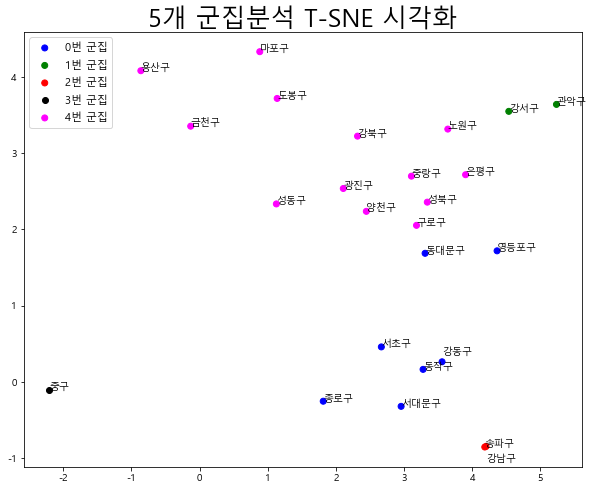

In [110]:
plt.figure(figsize=(10,8))

col=[]
for i in range(len(fin)):
    if fin.loc[i,'group_label'] == 0:
        col.append('blue') 
    elif fin.loc[i,'group_label'] == 1:
        col.append('green') 
    elif fin.loc[i,'group_label'] == 2:
        col.append('red') 
    elif fin.loc[i,'group_label'] == 3:
        col.append('black') 
    else:
        col.append('magenta')
fin['col'] = col

# Scatter plot with a different color by groups
groups = fin.groupby('group_label')

for name, group in groups:
    plt.scatter(group.x_data, group.y_data, label=name, c=group.col)
       

for i in range(len(fin)):
    if fin.loc[i,'자치구']=='강남구':
        plt.text(fin.x_data[i],fin.y_data[i]-0.2,fin.자치구[i], fontsize=10)
    elif fin.loc[i,'자치구']=='강동구':
        plt.text(fin.x_data[i],fin.y_data[i]+0.1,fin.자치구[i], fontsize=10)
    else:
        plt.text(fin.x_data[i],fin.y_data[i],fin.자치구[i], fontsize=10)

    
plt.legend(['0번 군집','1번 군집','2번 군집','3번 군집','4번 군집'],fontsize=11, loc='upper left') # legend position
plt.title('5개 군집분석 T-SNE 시각화', fontsize=25)

#plt.xlabel('X축', fontsize=14)
#plt.ylabel('Y축', fontsize=14)

plt.show()